# Aprendizaje Automatico con Scikit Learn

El *Machine Learning* es una rama de la informatica que utiliza tecnicas matematicas y estadisticas para desarrollar sistemas que en teoria aprenden algo a partir de un conjunto de datos.

El punto de partida es un conjunto de datos que podria ser una tabla ya sea en formato excel, csv o json. Esto se componen de instancias y atributos, los cuales en su respectivo orden, se entienden como *filas y columnas o registros y campos* si se consideran bases de datos. Lo importante es que todas las instancias deben tener la misma cantidad de atributos y los datos de cada atributo deben ser del mismo tipo de datos.

Distinguimos dos tipos de Aprendizaje Automatico: El *Aprendizaje Supervisado* en el que se espera predecir los valores de un atributo especifico, denominado *atributo clase*, a partir de los datos de los demas atributos. Y el *Aprendizaje No Supervisado* en el que no existe un atributo clase, por lo que su proposito es intentar encontrar algun patron entre los datos.

Al momento de aplicar un Aprendizaje Automatico, se debe dividir el conjunto de datos en dos partes: Conjunto de Entrenamiento (Train) usualmente un 80% y conjunto de prueba (Test) un 20%.

Los datos deben ser transformados y seleccionados para enfocarse correctamente en lo que se pretende identificar o predecir.

## Funcion para separar datos de Entrenamiento y de Prueba

Creamos una funcion que se encargue de separar los datos de entrenamiento y de prueba.

In [2]:
import pandas as pd

# cargams los datos del archivo
df = pd.read_csv('titanic_ml.csv')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,1
708,0,2,1,27.0,0,0,13.0000,2
709,1,1,0,19.0,0,0,30.0000,2
710,1,1,1,26.0,0,0,30.0000,0


In [3]:
# Mostrar todas las columnas del DataFrame
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [4]:
# importamos la libreria requerida para dividir conjuntos de datos en conjuntos 
# de entrenamiento y de prueba
from sklearn.model_selection import train_test_split

def separar(df, p_test, atributo_clase):
    '''
    Separa los datos de una DataFrame en atributos de entrada (train_x, test_x)
    y la variable objetivo (train_y, test_y)
    df: dataframe que se va a dividir
    p_test: proporcion del conjunto de datos utilizado como conjunto de prueba (0.0, 1.0)
    atributo_clase: Nombre de la variable objetivo que se quiere predecir
    '''
    
    train, test = train_test_split(df, test_size=p_test)
    atributos = df.columns.drop(atributo_clase)
    train_x = train[atributos]
    train_y = train[atributo_clase]
    test_x = test[atributos]
    test_y = test[atributo_clase]

    return train_x, train_y, test_x, test_y

- Utiliza la funcion *train_test_split()* para dividir el df en conjuntos de entrenamiento y prueba segun la proporcion especificada el p_test.

- Extrae y almacena en la variable *atributos*, los nombres de las columnas que representan los atributos de entrada, excluyendo la variable objetivo.

- Guarda en *train_x* el conjunto de entrenamiento de los atributos de entrada.

- Guarda en *train_y* el conjunto de entrenamiento de la variable objetivo.

- Guarda en *test_x* el conjunto de prueba de los atributos de entrada.

- Guarda en *test_y* el conjunto de prueba de la variable objetivo.


In [5]:
# Creamos las variables requeridas con la funcion anterior
# La variable objetivo en este caso sera Survived
train_x, train_y, test_x, test_y = separar(df, 0.2, 'Survived')

In [6]:
train_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
603,2,1,18.0,0,0,11.5000,2
3,1,0,35.0,1,0,53.1000,2
198,2,0,24.0,0,2,14.5000,2
536,1,1,36.0,0,1,512.3292,0
44,3,1,11.0,5,2,46.9000,2
...,...,...,...,...,...,...,...
134,3,1,28.0,0,0,56.4958,2
673,3,1,42.0,0,0,7.5500,2
623,3,1,25.0,0,0,7.0500,2
85,3,0,14.5,1,0,14.4542,0


In [7]:
train_y

603    0
3      1
198    1
536    1
44     0
      ..
134    0
673    0
623    0
85     0
367    1
Name: Survived, Length: 569, dtype: int64

In [8]:
test_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
627,3,1,1.0,1,2,20.5750,2
114,2,1,18.0,0,0,11.5000,2
62,1,1,28.0,0,0,47.1000,2
677,3,1,74.0,0,0,7.7750,2
411,2,0,36.0,1,0,26.0000,2
...,...,...,...,...,...,...,...
477,3,1,30.0,0,0,7.8958,2
325,3,0,20.0,0,0,8.6625,2
329,3,1,21.0,0,0,7.7750,2
113,3,1,19.0,0,0,6.7500,1


In [9]:
test_y

627    1
114    0
62     0
677    0
411    1
      ..
477    0
325    0
329    0
113    0
643    0
Name: Survived, Length: 143, dtype: int64

## Preprocesado de los Datos

Empleamos tecnicas de transformacion de datos:

- **One Hot Encodiing**: es una tecnica utilizada para convertir atributos o variables categoricas en binarios. Es necesario esta conversion debido a que los modelos solo pueden interpretar numeros.

- **Escalado**: consiste en escalar todos los atributos para que sus valores esten entre 0 y 1.

In [10]:
# aplicamos One Hot sobre la columna Embarked
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ohe = ColumnTransformer([('Embarked_ohe', OneHotEncoder(categories='auto'), ['Embarked'])], 
                        remainder='passthrough')

train_X_1 = ohe.fit_transform(train_x)
train_X_1

array([[ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    , 11.5   ],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  2.    , 14.5   ],
       ...,
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  7.05  ],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  0.    , 14.4542],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  0.    , 26.55  ]])

In [11]:
# Escalado de los atributos entre 0 y 1
from sklearn.preprocessing import MinMaxScaler

min_max_scales = MinMaxScaler()
train_X_2 = min_max_scales.fit_transform(train_X_1)
train_X_2

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.02244651],
       [0.        , 0.        , 1.        , ..., 0.2       , 0.        ,
        0.1036443 ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.4       ,
        0.02830212],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.01376068],
       [1.        , 0.        , 0.        , ..., 0.2       , 0.        ,
        0.02821272],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.05182215]])

- Se parametrizo la columna *Embarked* en mas categorias de acuerdo al numero de categorias que almacena usando la clase *ColumnTransfomer* y realiza la transformacion con el metodo *fit_transform()*.

- Lo anterior crea un objeto *train_X_1* con los nuevo atributos 

- Se transforman todos los nuevos atributos almacenados en *train_X_1* usando la clase *MinMaxScaler* y el metodo *fit_transform()* para crear el nuevo objeto *train_X_2* que contendra todos los atributos ya transformados con sus datos en el rango de 0 a 1.

## Clasificacion

La bibilioteca Scikit-Learn posee varios clasificadores, en lo que sigue mostraremos dos de ellos: Support Vector Machine (*SVM*) y K-Nearest Neighbors (*KNN*)

### **SVM**

In [16]:
# importamos el clasificador
from sklearn.svm import SVC

# cargamos los datos
df = pd.read_csv('titanic_ml.csv')

# aplicamos One Hot sobre la variable Embarked
ohe = ColumnTransformer(
    [('embarked_ohe', OneHotEncoder(categories='auto'), ['Embarked'])
    ], remainder='passthrough'
)

# escalamos los atributos de la variable Embarked
min_max_scaler = MinMaxScaler()

# creamos los conjuntos de entrenamiento y de prueba
train_X_2 = min_max_scaler.fit_transform(ohe.fit_transform(train_x))
test_X_2 = min_max_scaler.fit_transform(ohe.fit_transform(test_x))

# Entrenamiento
clasificadorSVM = SVC()
clasificadorSVM.fit(train_X_2, train_y)
    
# Uso del modelo
clasificadorSVM.predict(test_X_2)

# Evaluacion del modelo
print('Precision: ', clasificadorSVM.score(test_X_2, test_y))


Precision:  0.8181818181818182


### **KNN**

In [17]:
# importamos el clasificador KNN
from sklearn.neighbors import KNeighborsClassifier

# cargamos los datos
df = pd.read_csv('titanic_ml.csv')

# aplicamos One Hot sobre la variable Embarked
ohe = ColumnTransformer(
    [('embarked_ohe', OneHotEncoder(categories='auto'), ['Embarked'])
    ], remainder='passthrough'
)

# escalamos los atributos de la variable Embarked
min_max_scaler = MinMaxScaler()

# creamos los conjuntos de entrenamiento y de prueba
train_X_2 = min_max_scaler.fit_transform(ohe.fit_transform(train_x))
test_X_2 = min_max_scaler.fit_transform(ohe.fit_transform(test_x))

# Entrenamiento
clasificadorKNN = KNeighborsClassifier()
clasificadorKNN.fit(train_X_2, train_y)

# Uso del modelo
clasificadorKNN.predict(test_X_2)

# Presicion
print('Precision: ', clasificadorKNN.score(test_X_2, test_y))

Precision:  0.7972027972027972


## Persistencia del Modelo

Una vez realizado el entrenamiento y obtenido la precision del modelo clasificador, se querra reutilizar el  mismo para futuros datos que ya no seran los de prueba, seran nuevos datos. La solucion es guardar y cargar los clasificadores usando la serializacion de objetos.

In [18]:
# importamos la libreria joblib
import joblib

# guardamos el clasificador KNN
joblib.dump(clasificadorKNN, 'knn.plk')

# cargamos el clasificador
cargaKNN = joblib.load('knn.plk')

cargaKNN

KNeighborsClassifier()

In [19]:
# importamos la libreria joblib
import joblib

# guardamos el clasificador SVM
joblib.dump(clasificadorSVM, 'svm.plk')

# cargamos el clasificador
cargaSVM = joblib.load('svm.plk')

cargaSVM

SVC()

## Visualizacion de Datos con Matplotlib

Esta biblioteca nos brinda variso diagramas para visualizar los datos, como histogramas, graficas de barra, circulares, entre otros. 

### Diagrama de Linea

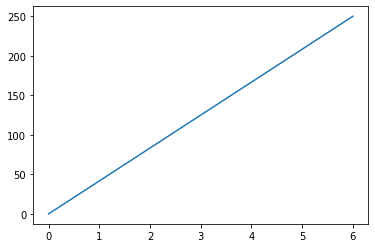

In [20]:
# importamos las librerias
import matplotlib.pyplot as plt
import numpy as np

# creamos valores para probar la libreria
x = np.array([0,6])
y = np.array([0,250])

# graficamos los valores
plt.plot(x, y)
plt.show()

- Importamos la libreria *matplotlib.pyplot* con el alias *plt*.

- Implementamos los metodos *plot()* y *show()* para graficar y mostrar la grafica.

- El metodo *plot()* crea una linea entre los puntos que se le pasan como argumento, por defecto